# Homework 7
# CSCE 633
## Arya Rahmanian
### Summer 2024

## Data Exploration

### Load Data

In [3]:
import pandas as pd

data_path = 'wine/wine.data'

column_names = [
    'Label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline'
]
wine_data = pd.read_csv(data_path, names=column_names)

wine_features = wine_data.drop(columns=['Label'])

wine_features.head()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Plot Distributions

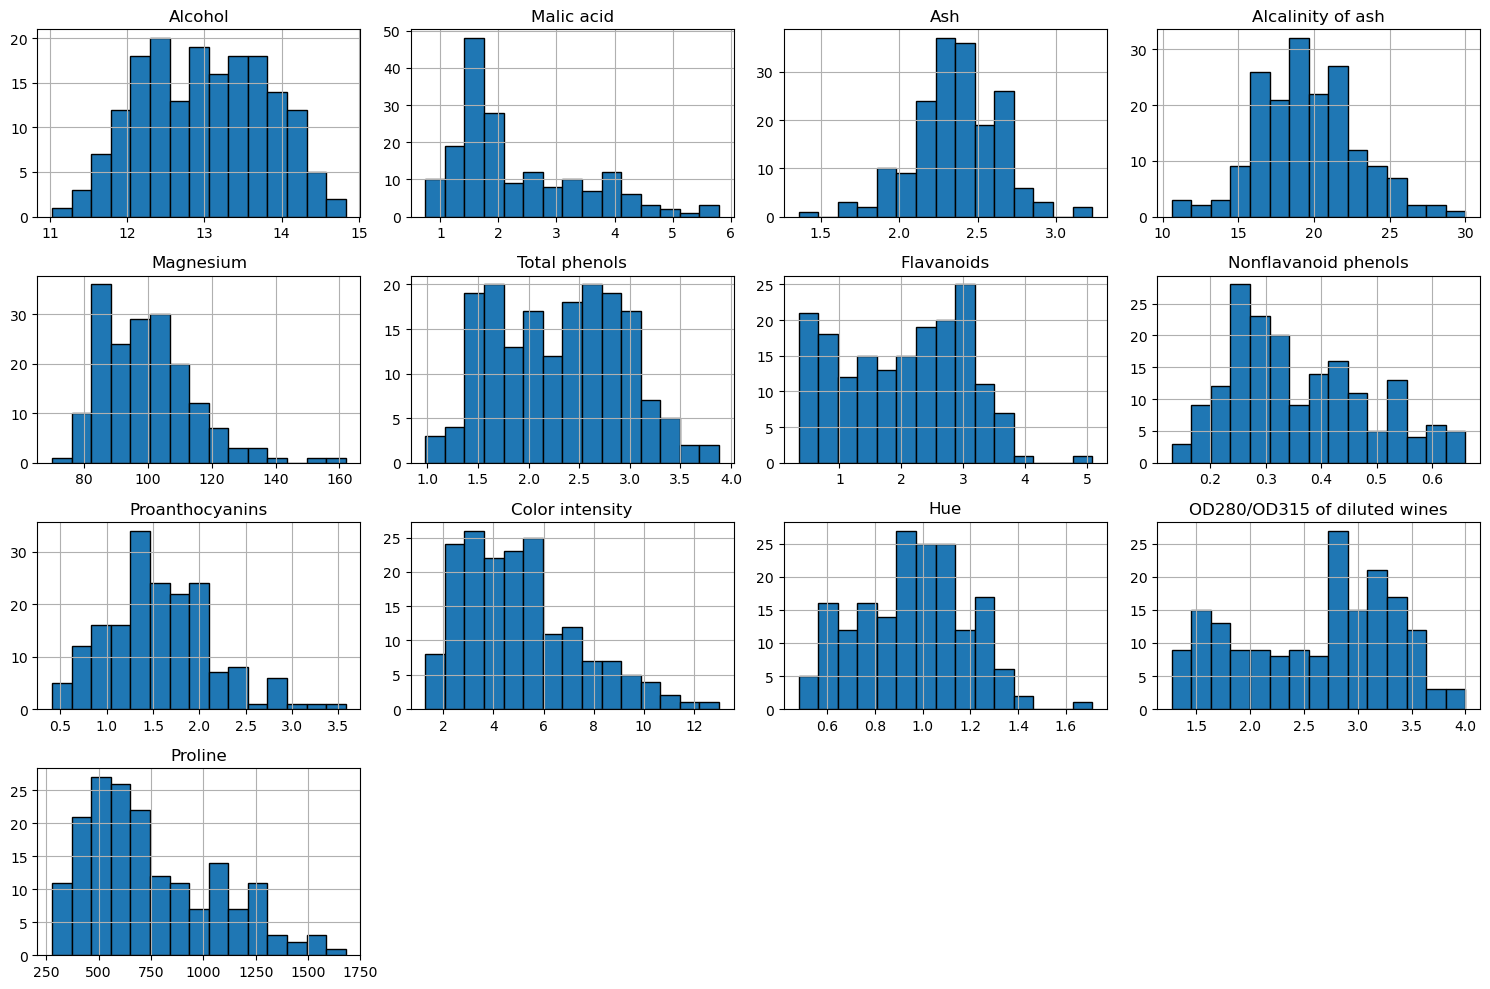

In [8]:
import matplotlib.pyplot as plt
wine_features.hist(bins=15, figsize=(15, 10), layout=(4, 4), edgecolor='black')
plt.tight_layout()
plt.show()

Alcohol: The distribution appears to be roughly normal, centered around 13. The spread indicates some variability in alcohol content among the wines.

Malic acid: This variable has a right-skewed distribution, indicating that most wines have lower malic acid content, with a few wines having significantly higher values.

Ash: The ash content distribution is fairly symmetric, centered around 2.3, suggesting a normal distribution with less variability.

Alcalinity of ash: This variable also appears to have a roughly normal distribution but with a wider spread, indicating greater variability in alcalinity among the wines.

Magnesium: The magnesium content shows a left-skewed distribution, with most values concentrated around 90-100, and a few wines having much higher magnesium levels.

Total phenols: The distribution is right-skewed, suggesting that most wines have lower total phenol content, with some wines having significantly higher values.

Flavanoids: This variable is also right-skewed, indicating that most wines have lower flavonoid content, with a few wines exhibiting higher concentrations.

Nonflavanoid phenols: The distribution is nearly normal, centered around 0.3, suggesting less variability in nonflavanoid phenol content.

Proanthocyanins: This histogram shows a right-skewed distribution, indicating that most wines have lower proanthocyanin content.

Color intensity: The distribution is right-skewed, with most wines having lower color intensity and a few wines exhibiting much higher values.

Hue: The hue distribution is left-skewed, indicating that most wines have a hue value around 1.0, with fewer wines having higher hue values.

OD280/OD315 of diluted wines: The distribution is right-skewed, suggesting that most wines have lower OD280/OD315 values, with some wines having significantly higher values.

Proline: This variable has a right-skewed distribution, indicating that most wines have lower proline content, with a few wines having much higher concentrations.

Intuition and Implications:
Skewness: Many variables exhibit right-skewness, suggesting that most wines have lower values for these constituents, with a few wines having higher concentrations. This indicates that these features might not be normally distributed and could require transformation for certain analyses.

Variability: Variables like Alcohol, Alcalinity of Ash, and Magnesium show a wider spread, indicating greater variability among the wines. This could suggest differences in the winemaking process or grape characteristics.

Normal Distributions: Some features, such as Ash and Nonflavanoid Phenols, show more symmetric distributions, suggesting a more consistent presence across different wine types.

These initial observations can guide further analyses, such as normalization or transformation of skewed features and considerations for clustering or classification algorithms in unsupervised learning tasks.

### Correlation Matrix via heatmap

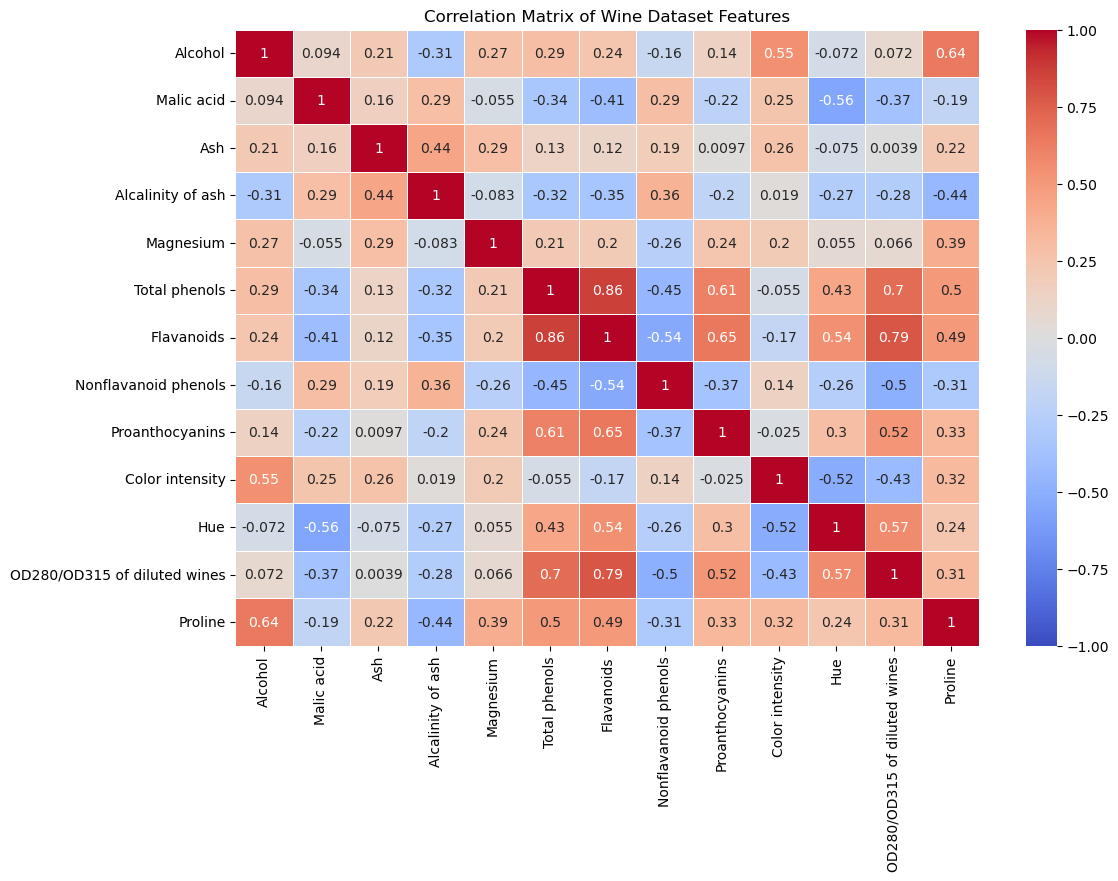

In [11]:
import seaborn as sns
import numpy as np

correlation_matrix = wine_features.corr()

#plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Wine Dataset Features')
plt.show()

Strong Positive Correlations:

Flavanoids and Total phenols (0.86): Indicates that higher flavonoid content is associated with higher total phenol content.
OD280/OD315 of diluted wines and Flavanoids (0.79): Suggests that wines with higher flavonoid content tend to have higher OD280/OD315 values.
OD280/OD315 of diluted wines and Total phenols (0.74): Higher total phenol content is associated with higher OD280/OD315 values.
Flavanoids and Proanthocyanins (0.65): Higher flavonoid content is associated with higher proanthocyanin content.
Color intensity and OD280/OD315 of diluted wines (0.55): Indicates a moderate association between color intensity and OD280/OD315 values.
Strong Negative Correlations:

Flavanoids and Nonflavanoid phenols (-0.34): Suggests that wines with higher flavonoid content tend to have lower nonflavonoid phenol content.
Moderate Positive Correlations:

Magnesium and Alcohol (0.21): Indicates a slight association between higher magnesium and alcohol content.
Color intensity and Proanthocyanins (0.39): Suggests a moderate association between color intensity and proanthocyanin content.
Moderate Negative Correlations:

Alcohol and Malic acid (-0.33): Indicates that higher alcohol content is associated with lower malic acid content.
Total phenols and Malic acid (-0.34): Suggests that higher total phenol content is associated with lower malic acid content.
Potential Associations:
Phenolic Compounds: The strong positive correlations between flavonoids, total phenols, and OD280/OD315 values indicate that these phenolic compounds are closely related, likely contributing to the antioxidant properties of the wine.
Color Intensity: The positive correlations with OD280/OD315 and proanthocyanins suggest that color intensity is influenced by phenolic compounds, impacting the wine's appearance and potentially its sensory properties.
Alcohol and Acidity: The negative correlation between alcohol and malic acid implies that wines with higher alcohol content tend to have lower acidity, which might influence the wine's taste and aging potential.

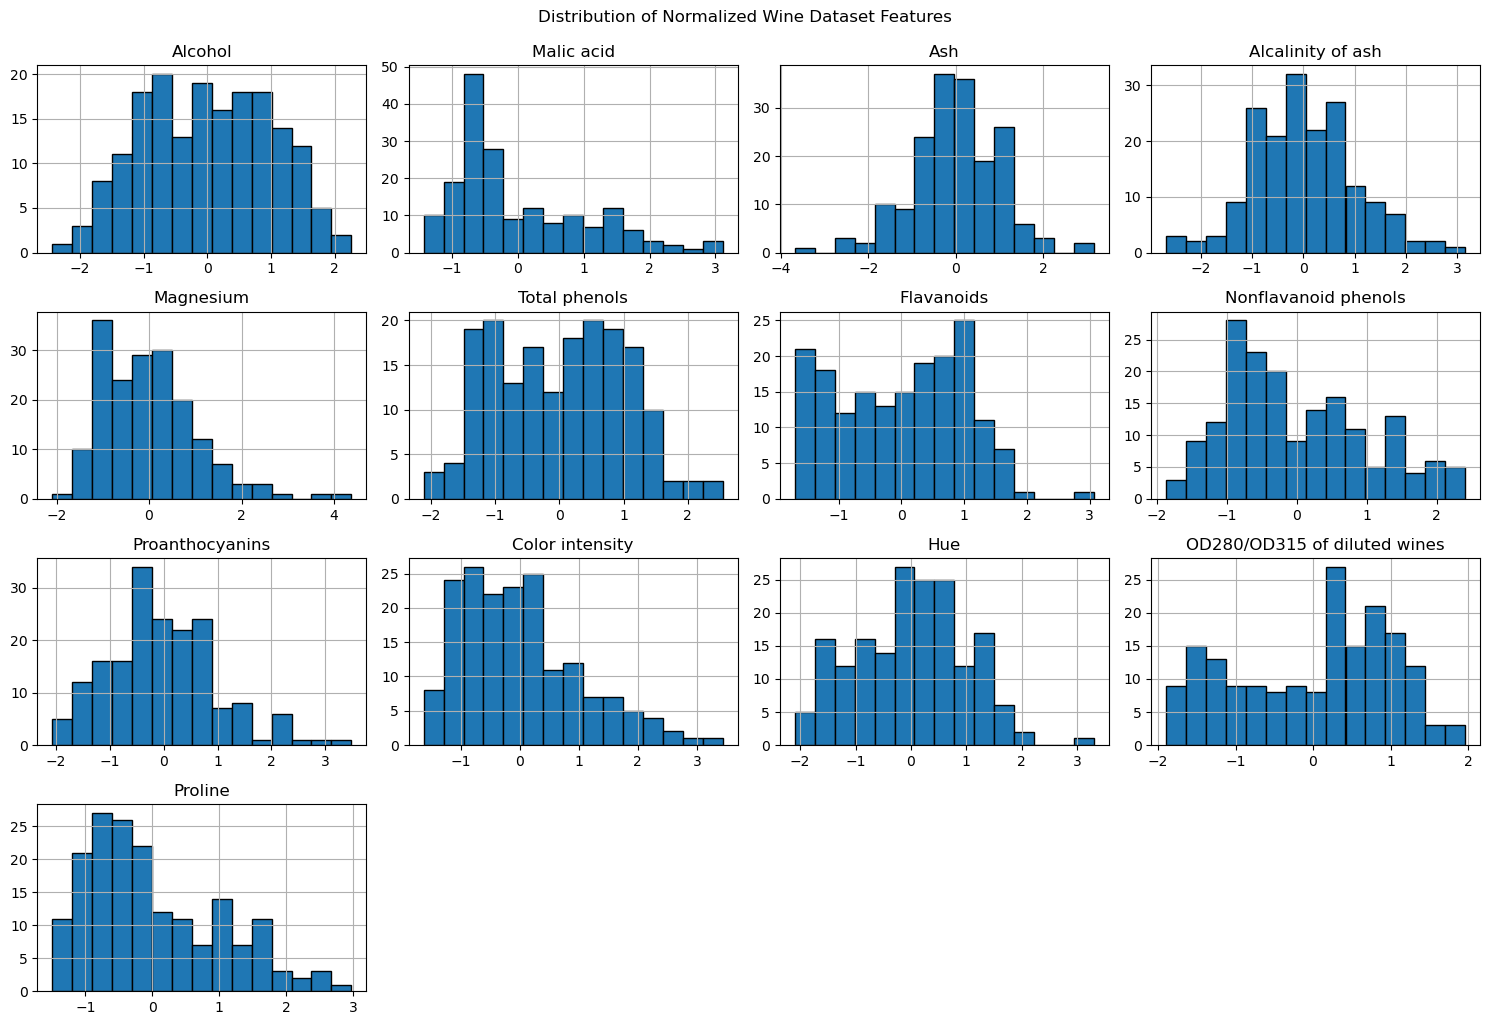

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Fit the data
normalized_features = scaler.fit_transform(wine_features)

# convert back into df
normalized_features_df = pd.DataFrame(normalized_features, columns=wine_features.columns)

normalized_features_df.hist(bins=15, figsize=(15, 10), layout=(4, 4), edgecolor='black')
plt.tight_layout()
plt.suptitle('Distribution of Normalized Wine Dataset Features', y=1.02)
plt.show()


## K Means Clustering

### Choose Number of Clusters

C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

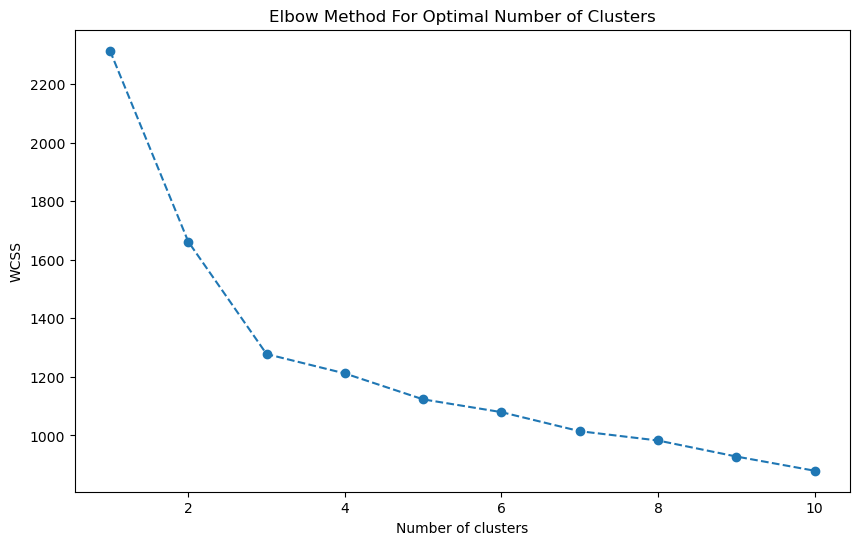

In [22]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

3 is the elbow, hence the optimal number of clusters

### K means results

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_features)

# Retrieve cluster assignments and centroids
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

# Create a DataFrame for cluster assignments
wine_data['Cluster'] = cluster_labels

# Count the number of wines in each cluster
cluster_counts = wine_data['Cluster'].value_counts()

# Print the number of wines in each cluster
print("Number of wines in each cluster:")
print(cluster_counts)

# Print the centroids of each cluster
centroids_df = pd.DataFrame(cluster_centroids, columns=wine_features.columns)
print("\nCentroid of each cluster:")
print(centroids_df)

Number of wines in each cluster:
Cluster
0    65
2    62
1    51
Name: count, dtype: int64

Centroid of each cluster:
    Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0 -0.926072   -0.394042 -0.494517           0.170602  -0.491712   
1  0.164907    0.871547  0.186898           0.524367  -0.075473   
2  0.835232   -0.303810  0.364706          -0.610191   0.577587   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0      -0.075983    0.020813             -0.033534         0.058266   
1      -0.979330   -1.215248              0.726064        -0.779706   
2       0.885237    0.977820             -0.562090         0.580287   

   Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
0        -0.901914  0.461804                      0.270764 -0.753846  
1         0.941539 -1.164789                     -1.292412 -0.407088  
2         0.171063  0.473984                      0.779247  1.125185  


C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
